# Bollinger Band Function

## 1. Overview

Bollinger Bands are a widely-used technical analysis tool employed by traders and analysts to assess volatility, potential trend reversals, and overbought or oversold conditions in financial markets. Comprising three lines, these bands provide valuable insights into the market's behavior:

- **Middle Band (MA):** Represents the trend direction and serves as a simple moving average (SMA) with a specified window size.

- **Upper Band:** Calculated by adding a multiple of the standard deviation to the moving average, indicating potential overbought conditions.

- **Lower Band:** Calculated by subtracting a multiple of the standard deviation from the moving average, signaling potential oversold conditions.

### 1.1 Purpose

Traders leverage Bollinger Bands to:

- Identify changes in volatility.
- Spot potential trend reversals.
- Recognize overbought and oversold conditions.

### 1.2 How to Use

- When the price touches or crosses the upper band, it may suggest overbought conditions.
- When the price touches or crosses the lower band, it may indicate oversold conditions.
- The width of the bands reflects volatility – narrower bands suggest lower volatility, while wider bands indicate higher volatility.

## 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

## 3. Define Functions

### 3.1 fetch_historical_data

- Fetches historical stock price data from Yahoo Finance for a given list of assets within a specified date range.
- Provides flexibility for fetching data for a single stock or multiple stocks.

In [2]:
def fetch_historical_data(assets, start_date, end_date):
    """
    Fetch historical stock price data from Yahoo Finance.

    Parameters:
    - assets (list or str): List of stock tickers or a single stock ticker as a string.
    - start_date (str): Start date for data retrieval in "YYYY-MM-DD" format.
    - end_date (str): End date for data retrieval in "YYYY-MM-DD" format.

    Returns:
    - pd.DataFrame: Historical stock price data.

    Example:
    >>> assets = ['AAPL', 'GOOGL', 'MSFT']
    >>> start_date = '2023-01-01'
    >>> end_date = '2023-12-31'
    >>> data = fetch_historical_data(assets, start_date, end_date)
    >>> print(data.head())
                  AAPL        GOOGL        MSFT
    Date
    2023-01-01  150.00      2800.00      300.00
    2023-01-02  152.50      2825.00      305.00
    2023-01-03  155.00      2850.00      310.00
    2023-01-04  157.50      2875.00      315.00
    2023-01-05  160.00      2900.00      320.00
    """
    if isinstance(assets, str):
        assets = [assets]

    if len(assets) == 1:
        # Wrap the Series in a DataFrame for consistency:
        data = pd.DataFrame(yf.download(assets, start=start_date, end=end_date)['Adj Close'])
    else:
        data = yf.download(assets, start=start_date, end=end_date)['Adj Close']
    return data

### 3.2 calculate_bollinger_bands

- Computes Bollinger Bands for a given DataFrame containing stock price data. 
- Modifies the input DataFrame by adding columns for the Moving Average ('MA'), Upper Bollinger Band, and Lower Bollinger Band.

In [6]:
def calculate_bollinger_bands(data, window_size, bollinger_std):
    """
    Calculate Bollinger Bands for a given DataFrame.

    Parameters:
    - data (pd.DataFrame): DataFrame containing stock price data with an 'Adj Close' column.
    - window_size (int): Size of the moving window for calculating the moving average.
    - bollinger_std (float): Number of standard deviations for Bollinger Bands.

    Returns:
    - None: Modifies the input DataFrame by adding 'MA', 'Upper', and 'Lower' columns.

    Example:
    >>> data = fetch_historical_data(['AAPL'], '2023-01-01', '2023-12-31')
    >>> calculate_bollinger_bands(data, window_size=20, bollinger_std=2)
    >>> print(data.head())
                  AAPL   Adj Close         MA       Upper       Lower
    Date
    2023-01-01  150.00  150.00      NaN       NaN        NaN
    2023-01-02  152.50  152.50      NaN       NaN        NaN
    2023-01-03  155.00  155.00      NaN       NaN        NaN
    2023-01-04  157.50  157.50      NaN       NaN        NaN
    2023-01-05  160.00  160.00  155.00  159.011555  150.988445
    """
    data['MA'] = data['Adj Close'].rolling(window=window_size).mean()
    data['Upper'] = data['MA'] + (data['MA'].rolling(window=window_size).std() * bollinger_std)
    data['Lower'] = data['MA'] - (data['MA'].rolling(window=window_size).std() * bollinger_std)


#### Example 1: Calculating Bollinger bands

The first 'window_size - 1' rows in the calculated columns ('MA', 'Upper', 'Lower') will have NaN values because the rolling calculations require a sufficient number of data points within the rolling window to compute meaningful statistics.

In [9]:
    >>> data = fetch_historical_data(['AAPL'], '2022-01-01', '2023-12-31')
    >>> calculate_bollinger_bands(data, window_size=10, bollinger_std=2)
    >>> print(data)

[*********************100%%**********************]  1 of 1 completed
             Adj Close          MA       Upper       Lower
Date                                                      
2022-01-03  179.953888         NaN         NaN         NaN
2022-01-04  177.669983         NaN         NaN         NaN
2022-01-05  172.943985         NaN         NaN         NaN
2022-01-06  170.056976         NaN         NaN         NaN
2022-01-07  170.225021         NaN         NaN         NaN
...                ...         ...         ...         ...
2023-12-22  193.600006  195.747002  198.786182  192.707821
2023-12-26  193.050003  195.734003  198.262911  193.205094
2023-12-27  193.149994  195.578001  197.416839  193.739164
2023-12-28  193.580002  195.140001  196.365870  193.914132
2023-12-29  192.529999  194.582001  195.567172  193.596830

[501 rows x 4 columns]


## 3.3 plot_bollinger_bands

- Visualizes time series data along with Bollinger Bands and a Moving Average. 
- Provides insights into the stock's price movements and the potential volatility.


In [12]:
def plot_bollinger_bands(data, asset, window_size, bollinger_std, short_span, long_span, signal_span):

    """
    Plot the time series data along with Bollinger Bands and Moving Average.

    Parameters:
    - data (pd.DataFrame): DataFrame containing stock price data with an 'Adj Close' column.
    - asset (str): Ticker symbol for the stock.
    - window_size (int): Size of the moving window for calculating the moving average.
    - bollinger_std (float): Number of standard deviations for Bollinger Bands.

    Returns:
    - None: Displays the time series plot.
    """
    plt.figure(figsize=(12, 6))

    plt.plot(data.index, data['Adj Close'], label=f'{asset} Stock Price', color='blue')
    plt.plot(data.index, data['Upper'], label=f'Upper {bollinger_std}σ Bollinger Band', color='red', linestyle='--')
    plt.plot(data.index, data['Lower'], label=f'Lower {bollinger_std}σ Bollinger Band', color='green', linestyle='--')
    plt.plot(data.index, data['MA'], label=f'{window_size}-Day Moving Average', color='orange')

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{asset} Time Series Plot')
    plt.legend()
    plt.grid(True)
    plt.show()


#### Example 2: Plotting Bollinger bands

[*********************100%%**********************]  1 of 1 completed


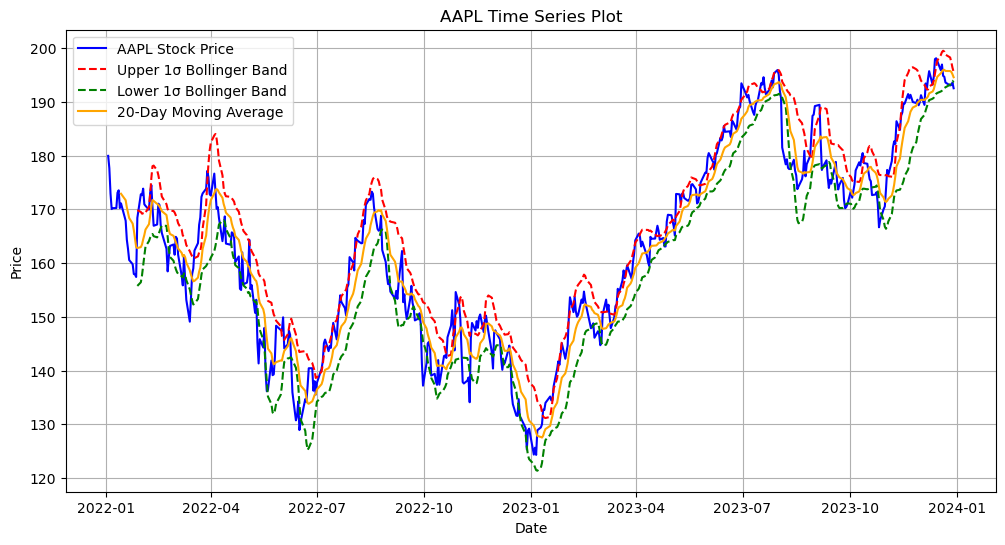

In [15]:
    >>> data = fetch_historical_data(['AAPL'], '2022-01-01', '2023-12-31')
    >>> calculate_bollinger_bands(data, window_size=10, bollinger_std=2)
    >>> plot_bollinger_bands(data, asset='AAPL', window_size=20, bollinger_std=1, short_span=10, long_span=15, signal_span=20)


## 3.4 configure

- Responsible for setting user-defined configuration parameters.

In [18]:
def configure():
    """
    Configure user-defined settings.

    Returns:
    - tuple: Tuple containing configuration settings (assets, start_date, end_date, window_size, bollinger_std, short_span, long_span, signal_span).
    """    
    assets = ["^VIX", "^GSPC", "^DJI", "^IXIC", "^TYX", "CL=F"]
    start_date = "2001-01-01"
    end_date = "2023-01-01"
    window_size = 25
    bollinger_std = 2
    short_span = 20
    long_span = 40
    signal_span = 20

    return assets, start_date, end_date, window_size, bollinger_std, short_span, long_span, signal_span

## 3.5 main

- The `main` function serves as the central hub for executing the time series analysis and plotting in the script.

[*********************100%%**********************]  1 of 1 completed


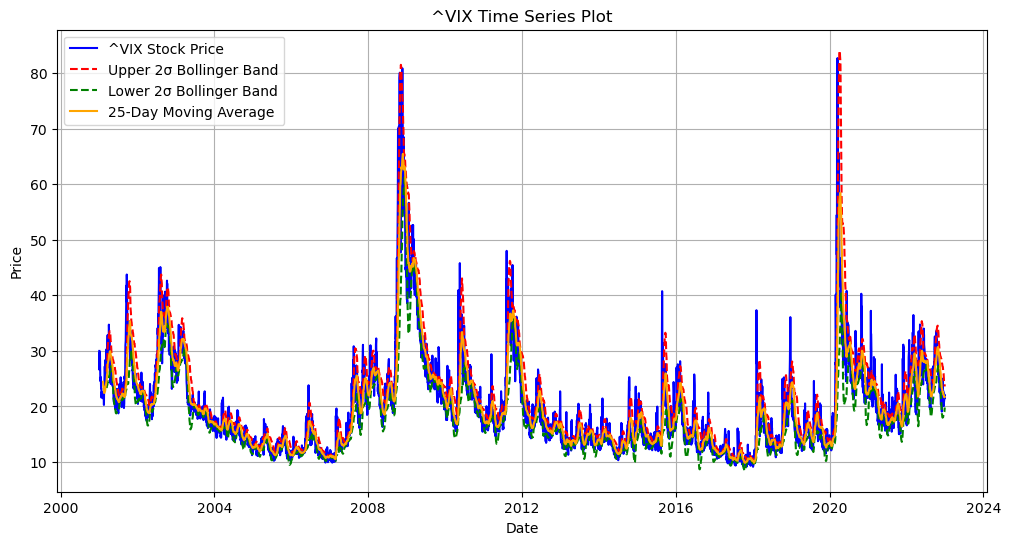

[*********************100%%**********************]  1 of 1 completed


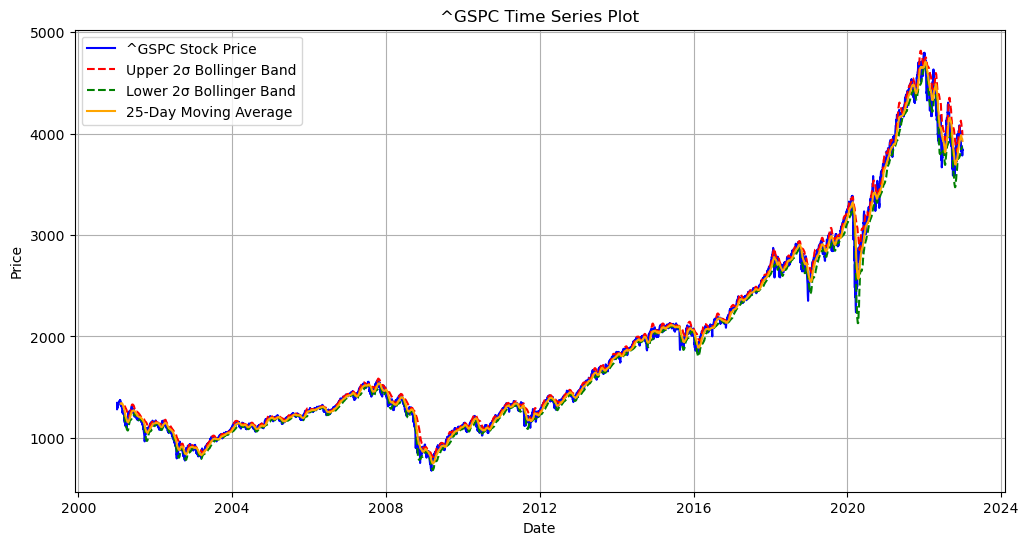

[*********************100%%**********************]  1 of 1 completed


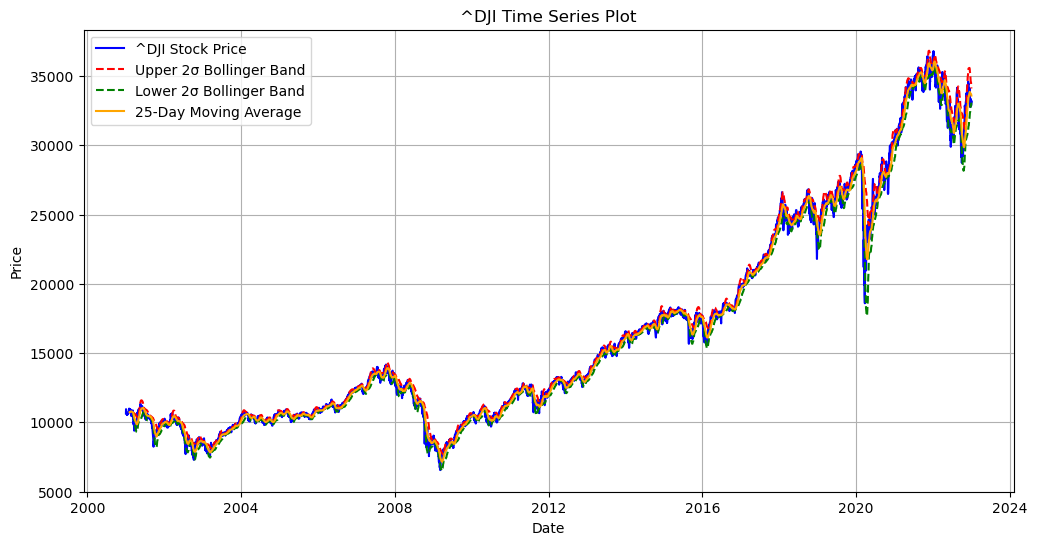

[*********************100%%**********************]  1 of 1 completed


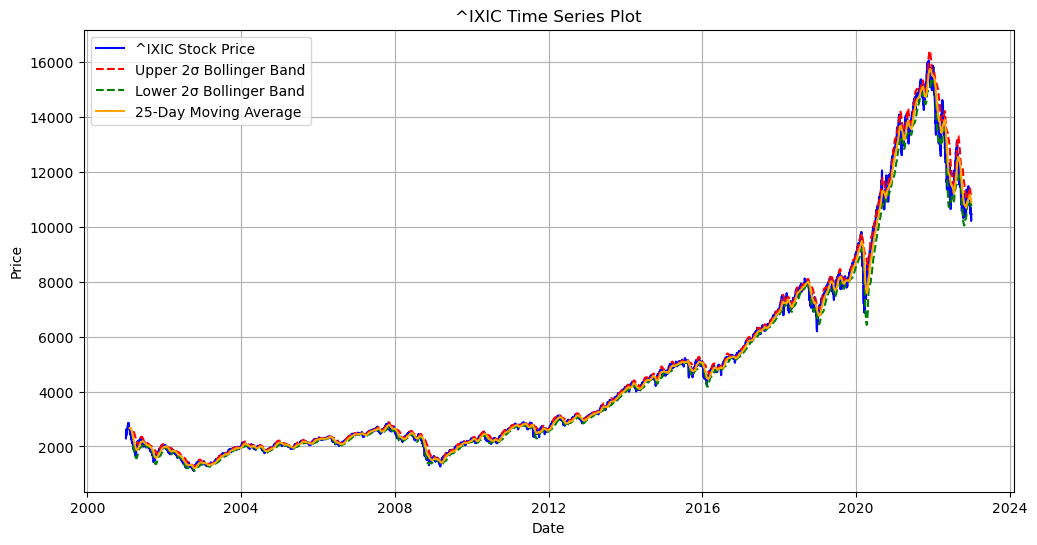

[*********************100%%**********************]  1 of 1 completed


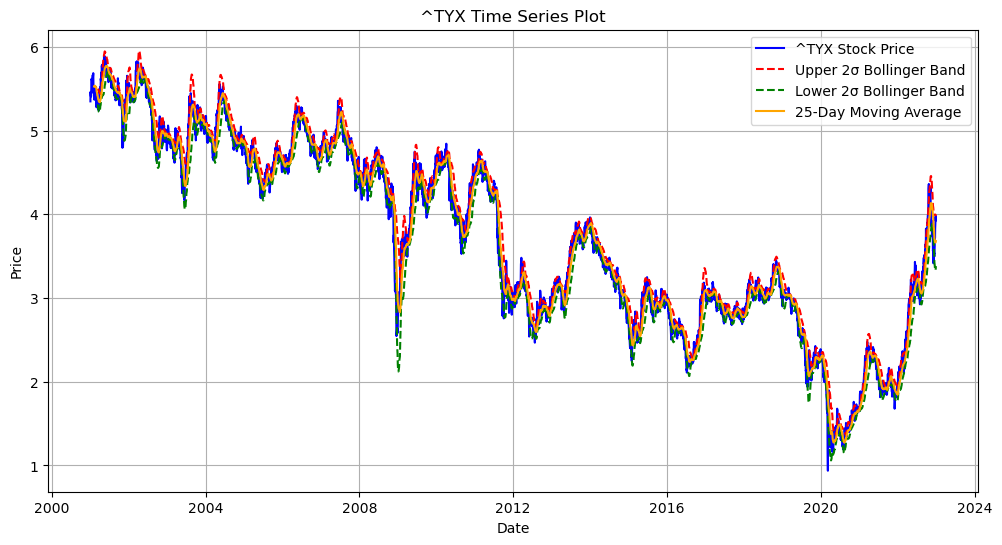

[*********************100%%**********************]  1 of 1 completed


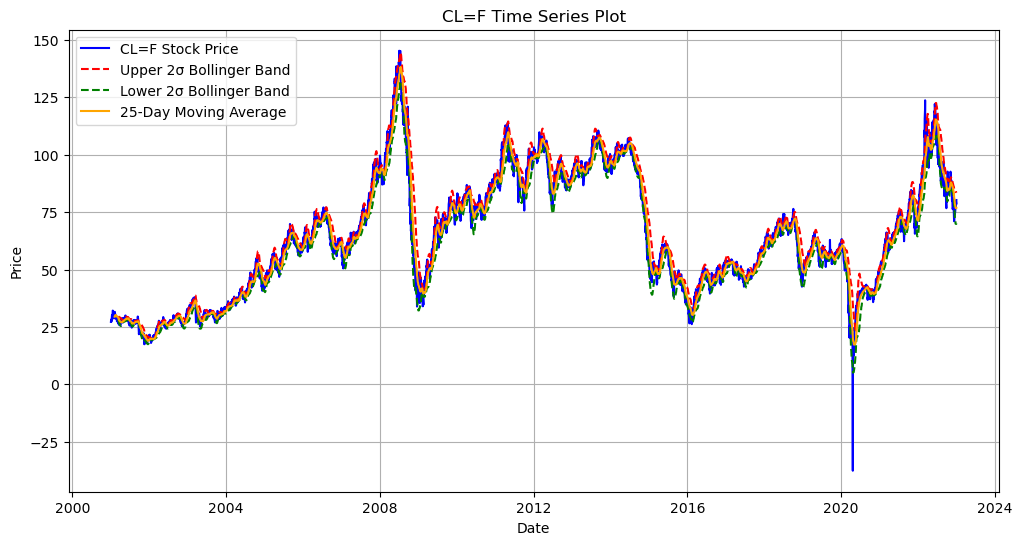

In [85]:
def main():
    """
    Main function to execute the time series analysis and plotting.

    Returns:
    - None: Executes the analysis and plotting for each asset.
    """
    assets, start_date, end_date, window_size, bollinger_std, short_span, long_span, signal_span = configure()

    for asset in assets:
        data = fetch_historical_data([asset], start_date, end_date)
        calculate_bollinger_bands(data, window_size, bollinger_std)
        plot_bollinger_bands(data, asset, window_size, bollinger_std, short_span, long_span, signal_span)

if __name__ == "__main__":
    main()
